## 1. Data Preprocessing and Exploration
### 1.1 Load the Data

In [1]:
from warnings import filterwarnings         # This is mainly used to avoid the unnecessary warnings which come while running the code due to the changes in the python liabrary 
filterwarnings("ignore")

In [2]:
import pandas as pd

# Load the matches.csv file
matches_df = pd.read_csv('matches.csv')
deliveries_df = pd.read_csv('deliveries.csv')

### 1.2 Basic Exploration

In [3]:
# Display basic information about the datasets
print(matches_df.info())
print(deliveries_df.info())

# Display the first few rows to understand the data
matches_df.head()
deliveries_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


## 2. Data Visualization
Visualizing the data can help uncover patterns, relationships, and outliers.

### 2.1 Wins per Team

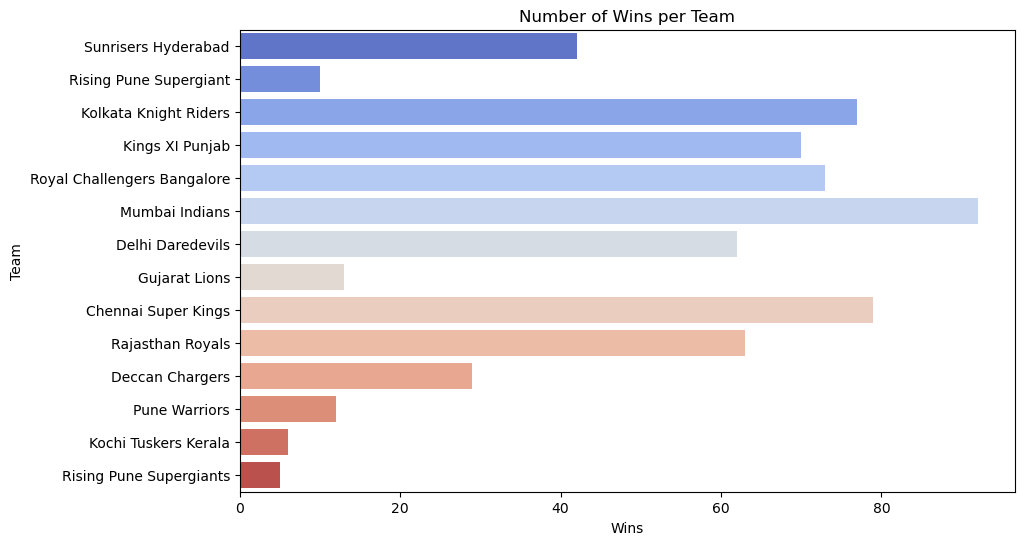

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(y='winner', data=matches_df, palette='coolwarm')
plt.title('Number of Wins per Team')
plt.xlabel('Wins')
plt.ylabel('Team')
plt.show()

### 2.2 Runs Over the Seasons

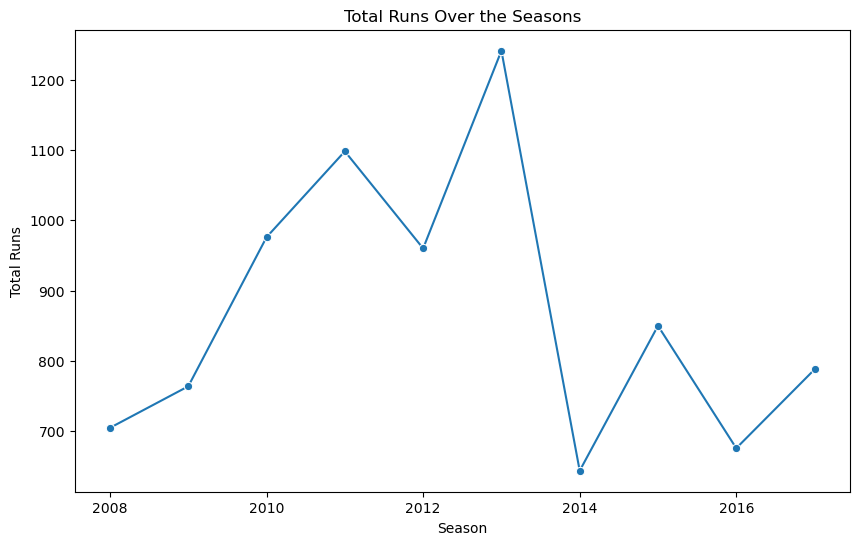

In [5]:
season_runs = matches_df.groupby('season')['win_by_runs'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=season_runs, x='season', y='win_by_runs', marker='o')
plt.title('Total Runs Over the Seasons')
plt.xlabel('Season')
plt.ylabel('Total Runs')
plt.show()

### 2.3 Distribution of Runs

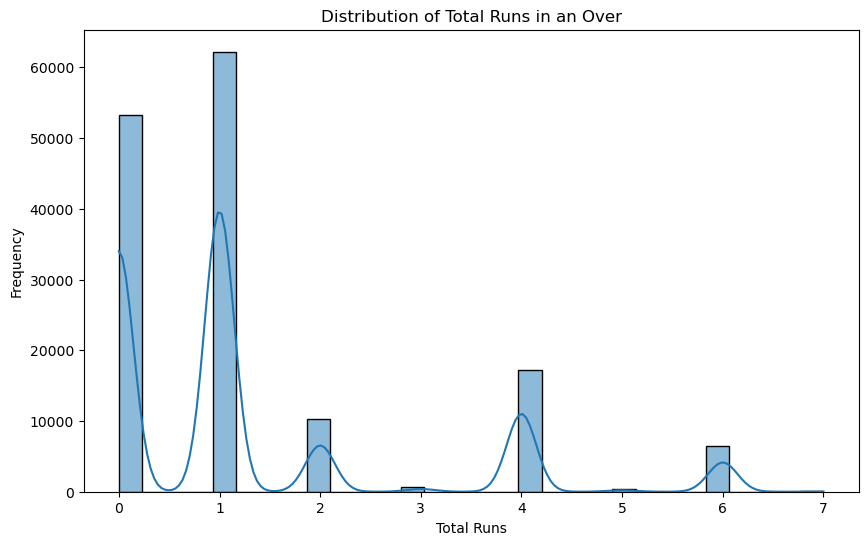

In [6]:
# Total runs distribution in matches
plt.figure(figsize=(10, 6))
sns.histplot(deliveries_df['total_runs'], bins=30, kde=True)
plt.title('Distribution of Total Runs in an Over')
plt.xlabel('Total Runs')
plt.ylabel('Frequency')
plt.show()

### 3.4 Win by Runs or Wickets

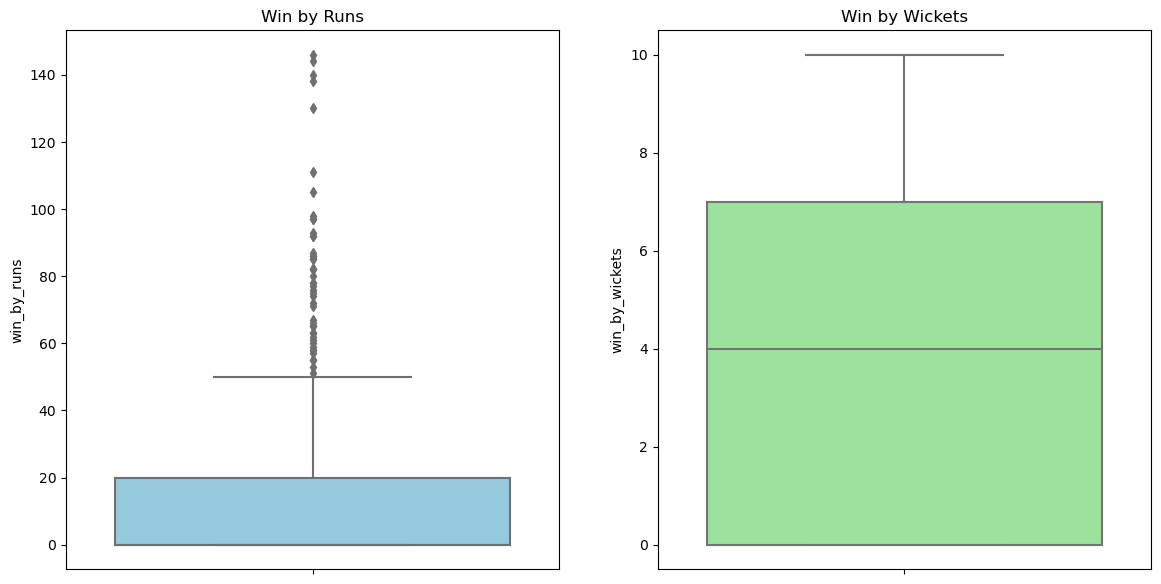

In [7]:
# Compare win by runs vs win by wickets
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.boxplot(y=matches_df['win_by_runs'], color='skyblue')
plt.title('Win by Runs')

plt.subplot(1, 2, 2)
sns.boxplot(y=matches_df['win_by_wickets'], color='lightgreen')
plt.title('Win by Wickets')
plt.show()

In [ ]:
### 3.5 Win Distribution Across Teams

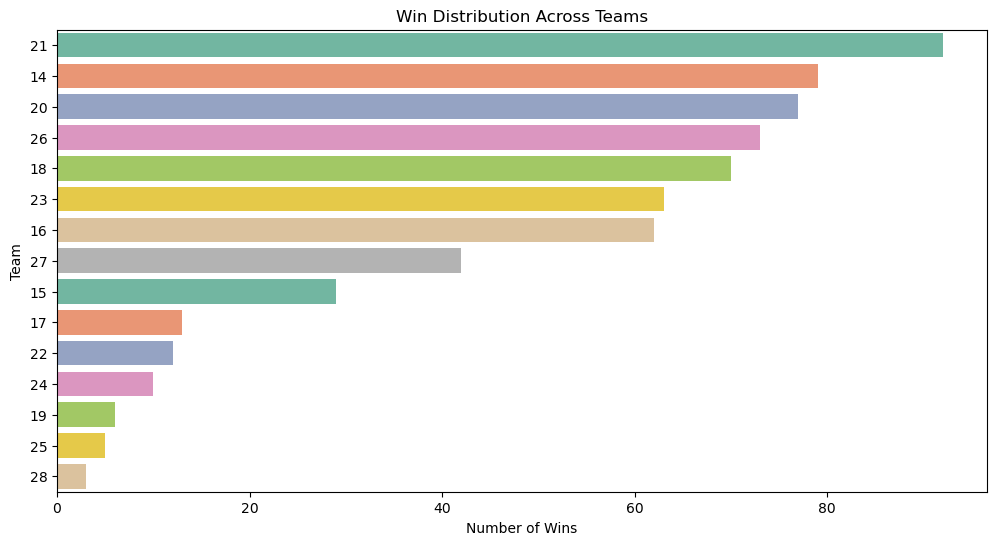

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(y='winner', data=matches_df, order = matches_df['winner'].value_counts().index, palette='Set2')
plt.title('Win Distribution Across Teams')
plt.xlabel('Number of Wins')
plt.ylabel('Team')
plt.show()

In [ ]:
### 3.6 Performance of Teams at Different Venues

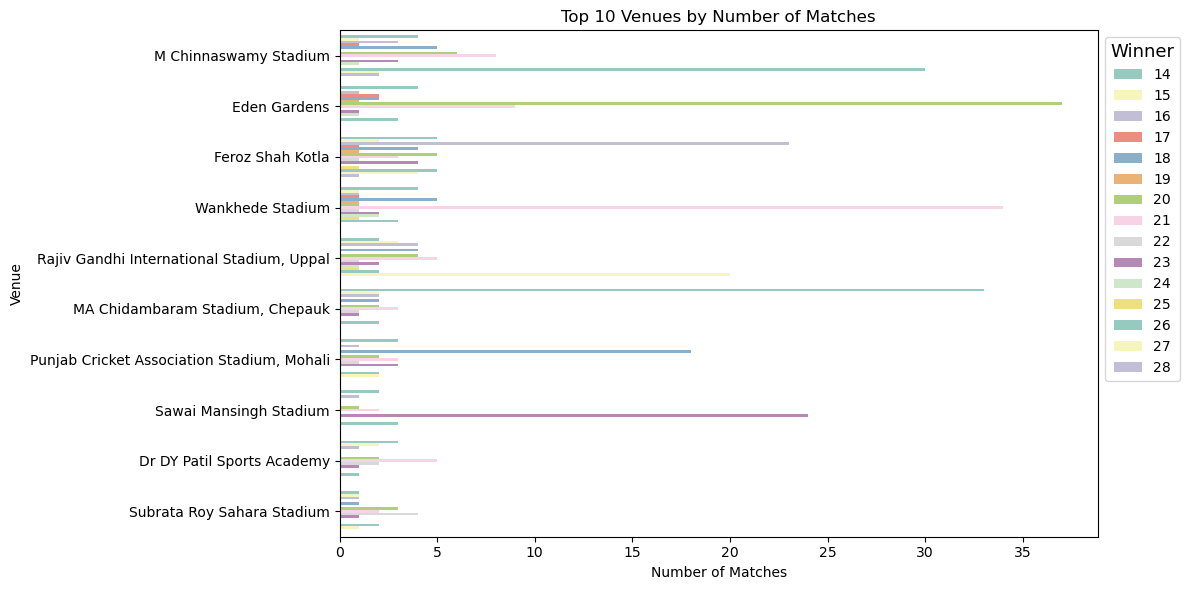

In [34]:
plt.figure(figsize=(12, 6))
sns.countplot(y='venue', hue='winner', data=matches_df, palette='Set3',
              order=matches_df['venue'].value_counts().iloc[:10].index)
plt.title('Top 10 Venues by Number of Matches')
plt.xlabel('Number of Matches')
plt.ylabel('Venue')
plt.legend(title='Winner', title_fontsize='13', fontsize='10', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

### Win Percentage by Toss Decision

In [36]:
# Check if 'toss_wins' DataFrame is empty
if toss_wins.empty:
    print("The 'toss_wins' DataFrame is empty. No matches where toss winner is also the match winner.")
else:
    # Validate that 'toss_decision' column exists and has data
    if 'toss_decision' in toss_wins.columns and toss_wins['toss_decision'].notnull().any():
        # Proceed with countplot
        plt.figure(figsize=(8, 4))
        sns.countplot(x='toss_decision', data=toss_wins)
        plt.title('Winning Percentage for Toss Decision')
        plt.xlabel('Toss Decision')
        plt.ylabel('Number of Wins')
        plt.show()
    else:
        print("The 'toss_decision' column is missing or contains no valid data.")

The 'toss_wins' DataFrame is empty. No matches where toss winner is also the match winner.


## 3. Feature Engineering

Based on the exploratory data analysis, you might need to create new features or modify existing ones to improve model performance.

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
# Encode the 'toss_decision' as binary
matches_df['toss_decision'] = matches_df['toss_decision'].map({'field': 0, 'bat': 1})

In [10]:
# Encoding categorical variables ('team1', 'team2', and 'winner') using LabelEncoder
encoder = LabelEncoder()
matches_df['team1'] = encoder.fit_transform(matches_df['team1'])
matches_df['team2'] = encoder.fit_transform(matches_df['team2'])

In [11]:
from sklearn.preprocessing import LabelEncoder

# Create an encoder instance
encoder = LabelEncoder()

# Handle missing values if any. Here, replacing NaN with a placeholder string 'unknown'
matches_df['team1'].fillna('unknown', inplace=True)
matches_df['team2'].fillna('unknown', inplace=True)
matches_df['winner'].fillna('unknown', inplace=True)

# Ensure all data is of type str to maintain consistency
matches_df['team1'] = matches_df['team1'].astype(str)
matches_df['team2'] = matches_df['team2'].astype(str)
matches_df['winner'] = matches_df['winner'].astype(str)

# Concatenate 'team1', 'team2', and 'winner' to capture all categories
all_teams = pd.concat([matches_df['team1'], matches_df['team2'], matches_df['winner']])

# Fit the encoder on all team names (now uniformly strings)
encoder.fit(all_teams)

# Transform 'team1', 'team2', and 'winner' using the fitted encoder
matches_df['team1'] = encoder.transform(matches_df['team1'])
matches_df['team2'] = encoder.transform(matches_df['team2'])
matches_df['winner'] = encoder.transform(matches_df['winner'])

## 4. Preparing Data for Modeling
Splitting the data into features (X) and target (y), followed by splitting into training and test sets.

In [12]:
print(matches_df.columns)

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')


In [23]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [24]:
# Create an imputer object to fill in missing values with the median of each column
imputer = SimpleImputer(strategy='median')

# Assuming you've already encoded your categorical features and identified NaNs

# Prepare the data for modeling
X = matches_df[['team1', 'team2', 'toss_decision']]  # Features
y = matches_df['winner']  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 5. Model Building
Building and training a simple model as a baseline.

### 5.1 Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Make a pipeline with imputation and logistic regression
pipeline = make_pipeline(imputer, StandardScaler(), log_reg)

# Train the model
pipeline.fit(X_train, y_train)

# Predictions
log_reg_predictions = pipeline.predict(X_test)

# Model Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg_predictions))


Logistic Regression Accuracy: 0.328125


### 5.2 Support Vector Machine (SVM)

In [27]:
from sklearn.svm import SVC

svm_pipeline = make_pipeline(imputer, StandardScaler(), SVC(kernel='linear', random_state=42))
svm_pipeline.fit(X_train, y_train)
svm_predictions = svm_pipeline.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))

SVM Accuracy: 0.296875


### 5.3 K-Nearest Neighbors (KNN)

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn_pipeline = make_pipeline(imputer, StandardScaler(), KNeighborsClassifier(n_neighbors=5))
knn_pipeline.fit(X_train, y_train)
knn_predictions = knn_pipeline.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, knn_predictions))

KNN Accuracy: 0.4765625


### 5.4 Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_pipeline = make_pipeline(imputer, RandomForestClassifier(random_state=42))
rf_pipeline.fit(X_train, y_train)
rf_predictions = rf_pipeline.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))

Random Forest Accuracy: 0.6328125


### 5.5 Gradient Boosting Classifier

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

gb_pipeline = make_pipeline(imputer, GradientBoostingClassifier(random_state=42))
gb_pipeline.fit(X_train, y_train)
gb_predictions = gb_pipeline.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_predictions))

Gradient Boosting Accuracy: 0.640625


## 6. Model Evaluation and Comparison
Evaluating and comparing the models based on their accuracy, and potentially other metrics like F1 score, depending on the problem specifics.

In [31]:
from sklearn.metrics import accuracy_score, classification_report

In [32]:
# Model Evaluation and Comparison
models = {
    'Random Forest': rf_pipeline, 
    'Gradient Boosting': gb_pipeline, 
    'Logistic Regression': pipeline,  # Assuming 'pipeline' is the name used for logistic regression
    'SVM': svm_pipeline, 
    'KNN': knn_pipeline
}

# Loop through models to print accuracy and classification report
for name, pipeline in models.items():
    predictions = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"{name} Accuracy: {accuracy}\n")
    print(f"{name} Classification Report:\n{classification_report(y_test, predictions)}\n")

Random Forest Accuracy: 0.6328125

Random Forest Classification Report:
              precision    recall  f1-score   support

          14       0.71      0.77      0.74        22
          15       0.20      0.25      0.22         4
          16       0.30      0.33      0.32         9
          17       1.00      0.40      0.57         5
          18       0.67      0.62      0.64        13
          19       0.00      0.00      0.00         0
          20       0.67      0.82      0.74        17
          21       0.88      0.93      0.90        15
          22       0.33      0.50      0.40         2
          23       0.64      0.54      0.58        13
          24       0.50      0.33      0.40         3
          26       0.62      0.47      0.53        17
          27       0.62      0.71      0.67         7
          28       0.00      0.00      0.00         1

    accuracy                           0.63       128
   macro avg       0.51      0.48      0.48       128
weighted